<a href="https://colab.research.google.com/github/arumshin-dev/python_conda_jupyter/blob/main/codeit/250901_SVM_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

In [ ]:
X_blob, y_blob = make_blobs(n_samples=50, centers=2, random_state=6)

In [ ]:
model_svc = SVC(kernel='rbf', C=10, gamma=0.01)          # C와 gamma설정 중요!
model_svc.fit(X_blob, y_blob)

SVC(C=10, gamma=0.01)

In [ ]:
xx, yy = np.meshgrid(np.linspace(X_blob[:, 0].min()-1, X_blob[:, 0].max()+1, 500),
                     np.linspace(X_blob[:, 1].min()-1, X_blob[:, 1].max()+1, 500))

In [ ]:
Z = model_svc.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [ ]:
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    ax.scatter(X[:, 0][y==0], X[:, 1][y==0], c='red', marker='o', label='Class 0')
    ax.scatter(X[:, 0][y==1], X[:, 1][y==1], c='blue', marker='x', label='Class 1')

    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
               s=150, facecolors='none', edgecolors='black', linewidths=2, label='Support Vectors')

    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
    ax.grid(True)


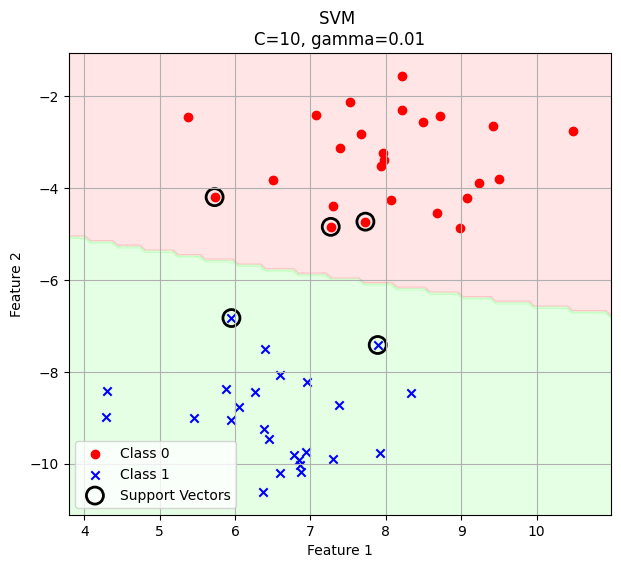

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
plot_decision_boundary(model_svc, X_blob, y_blob, ax, "SVM \nC=10, gamma=0.01")
plt.show()